<a href="https://colab.research.google.com/github/NathanAugusth/Algoritmos-e-Complexidade/blob/main/02_Cita%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install playwright
!playwright install
!playwright install-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 15.2 MB/s eta 0:00:00
173.7 MiB [] 0% 0.0s173.7 MiB [] 0% 7.4s173.7 MiB [] 0% 5.5s173.7 MiB [] 1% 4.5s173.7 MiB [] 1% 4.0s173.7 MiB [] 2% 3.9s173.7 MiB [] 2% 3.7s173.7 MiB [] 3% 3.4s173.7 MiB [] 3% 3.3s173.7 MiB [] 4% 3.1s173.7 MiB [] 5% 3.0s173.7 MiB [] 5% 3.3s173.7 MiB [] 6% 3.2s173.7 MiB [] 6% 3.3s173.7 MiB [] 7% 3.1s173.7 MiB [] 9% 2.8s173.7 MiB [] 10% 2.7s173.7 MiB [] 11% 2.5s173.7 MiB [] 12% 2.3s173.7 MiB [] 13% 2.4s173.7 MiB [] 14% 2.3s173.7 MiB [] 15% 2.2s173.7 MiB [] 15% 2.3s173.7 MiB [] 15% 2.4s173.7 MiB [] 15% 2.5s173.7 MiB [] 16% 2.5s173.7 MiB [] 17% 2.4s173.7 MiB [] 18% 2.3s173.7 MiB [] 19% 2.2s173.7 MiB [] 20% 2.1s173.7 MiB [] 21% 2.0s173.7 MiB [] 22% 1.9s173.7 MiB [] 23% 1.9s173.7 MiB [] 25% 1.8s173.7 MiB [] 26% 1.8s173.7 MiB [] 28% 1.7s173.7 MiB [] 29% 1.7s173.7 MiB [] 31% 1.6s173.7 MiB [] 32% 1.5s173.7 MiB [] 34% 1.4s173.7 MiB [] 36% 1.3s173.7 MiB [] 37% 1.3s173.7 MiB [] 39% 1.2s173.7 MiB [] 40% 1.2s173.7 MiB [] 


Citação 1:
Texto: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Autor: Albert Einstein


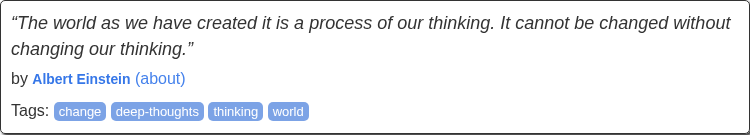

Captura de tela exibida para a Citação 1

Citação 2:
Texto: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Autor: J.K. Rowling


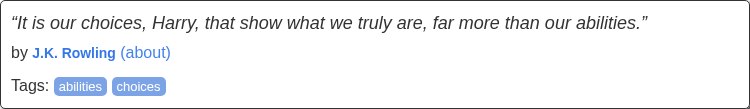

Captura de tela exibida para a Citação 2

Citação 3:
Texto: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Autor: Albert Einstein


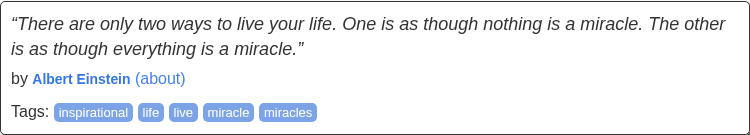

Captura de tela exibida para a Citação 3

Citação 4:
Texto: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Autor: Jane Austen


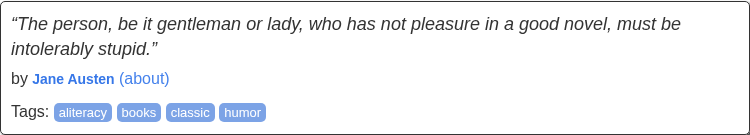

Captura de tela exibida para a Citação 4

Citação 5:
Texto: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Autor: Marilyn Monroe


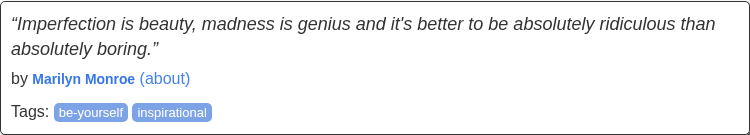

Captura de tela exibida para a Citação 5

Citação 6:
Texto: “Try not to become a man of success. Rather become a man of value.”
Autor: Albert Einstein


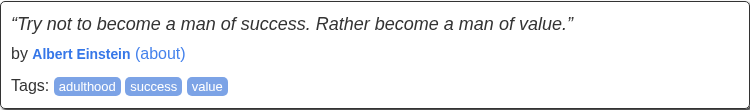

Captura de tela exibida para a Citação 6

Citação 7:
Texto: “It is better to be hated for what you are than to be loved for what you are not.”
Autor: André Gide


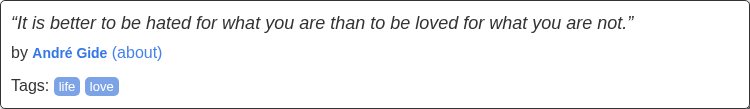

Captura de tela exibida para a Citação 7

Citação 8:
Texto: “I have not failed. I've just found 10,000 ways that won't work.”
Autor: Thomas A. Edison


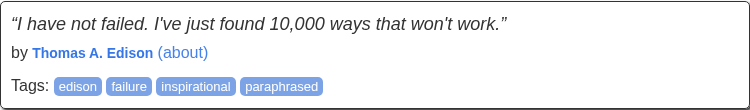

Captura de tela exibida para a Citação 8

Citação 9:
Texto: “A woman is like a tea bag; you never know how strong it is until it's in hot water.”
Autor: Eleanor Roosevelt


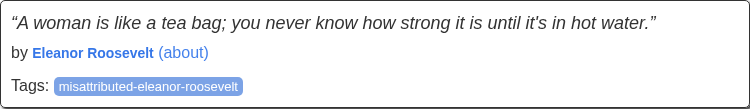

Captura de tela exibida para a Citação 9

Citação 10:
Texto: “A day without sunshine is like, you know, night.”
Autor: Steve Martin


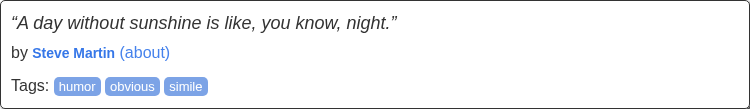

Captura de tela exibida para a Citação 10


In [3]:
from playwright.async_api import async_playwright
from IPython.display import Image, display
import asyncio
import nest_asyncio

nest_asyncio.apply()

# Define a função assíncrona principal para fazer scraping de citações de um site
async def scrape_quotes():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        await page.goto("https://quotes.toscrape.com/")

        # Seleciona todos os elementos com a classe 'quote' na página
        quotes = await page.query_selector_all(".quote")

        for index, quote in enumerate(quotes):
            # Seleciona o elemento com a classe 'text' dentro da citação
            quote_text = await quote.query_selector(".text")
            quote_content = await quote_text.inner_text() if quote_text else "Texto não encontrado"

            author = await quote.query_selector(".author")
            author_name = await author.inner_text() if author else "Autor desconhecido"

            # Imprime o número da citação, o texto e o autor
            print(f"\nCitação {index + 1}:")
            print(f"Texto: {quote_content}")
            print(f"Autor: {author_name}")

            # Captura uma captura de tela do elemento de citação em bytes
            screenshot_bytes = await quote.screenshot()
            display(Image(screenshot_bytes))
            print(f"Captura de tela exibida para a Citação {index + 1}")

        await browser.close()

await scrape_quotes()